In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from rhessys import utilities as rh
import hydro.objective_fxns as ofx
import ntpath
from hydro import objective_fxns as ob
from IPython.display import clear_output
import ipyparallel as p
import ProgressBar as pb
from pymail import alert
import time

In [2]:
C = p.Client()

In [3]:
C.ids

[0, 1, 2, 3, 4, 5, 6, 7]

In [4]:
view = C.load_balanced_view()

In [5]:
calname = 'et_cal29'
m = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_m.txt'%calname)
ksat = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_ksat.txt'%calname)
gw1 = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_gw1.txt'%calname)
gw2 = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_gw2.txt'%calname)
#gsmax = np.loadtxt(prfx+'gsmax.txt')
#sd = np.loadtxt(prfx+'sd.txt')
rd = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_rd.txt'%calname)
po = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_po.txt'%calname)
pa = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_pa.txt'%calname)
lai = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_lai.txt'%calname)
#sd = np.loadtxt('/RHESSys/ComoCreek_new/scripts/%s_sd.txt'%calname)

In [6]:
strt = 2008
nd = 2012

In [7]:
# load ET calibration data
FT = pd.read_pickle('../greenness_timing/data/AFX2_new.pcl')
FT['wateryear'] = FT.index.map(rh.wateryear)
FT_daily = FT.loc[(FT.wateryear>=strt) & (FT.wateryear<=nd),:]
FT_yearly = FT_daily.groupby(by='wateryear').sum()
FT_weekly = FT_daily.resample('W',how=np.sum)
FT_monthly = FT_daily.resample('M',how=np.sum)

/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


In [8]:
# load streamflow calibration data
Q = pd.read_pickle('/RHESSys/Comocreek/barnhatb/obs/como_specific_discharge_daily.pcl')
Q['wateryear'] = Q.index.map(rh.wateryear)
Q_daily = Q.loc[(Q.wateryear>=strt) & (Q.wateryear<=nd),:]
Q_yearly = Q_daily.groupby(by='wateryear').sum()
Q_weekly = Q_daily.resample('W',how=np.sum)
Q_monthly = Q_daily.resample('M',how=np.sum)

/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


In [9]:
%%px
import numpy as np
import pandas as pd
from rhessys import utilities as rh
import hydro.objective_fxns as ofx
# set bounds on the data
strt = 2008
nd = 2012
# load ET data
FT = pd.read_pickle('/Volumes/Users/Theo/projects/greenness_timing/data/AFX2_new.pcl')
FT['wateryear'] = FT.index.map(rh.wateryear)
FT_daily = FT.loc[(FT.wateryear>=strt) & (FT.wateryear<=nd),:]
FT_weekly = FT_daily.resample('W',how=np.sum)
FT_monthly = FT_daily.resample('M',how=np.sum)
# load streamflow data
Q = pd.read_pickle('/RHESSys/Comocreek/barnhatb/obs/como_specific_discharge_daily.pcl')
Q['wateryear'] = Q.index.map(rh.wateryear)
Q_daily = Q.loc[(Q.wateryear>=strt) & (Q.wateryear<=nd),:]
Q_weekly = Q_daily.resample('W',how=np.sum)
Q_monthly = Q_daily.resample('M',how=np.sum)

[stderr:0] 
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipyparallel/engine/__main__.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipyparallel/engine/__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipyparallel/engine/__main__.py:18: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipyparallel/engine/__main__.py:19: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
[stderr:1] 
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipyparallel/engine/__main__.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipy

In [10]:
files = glob.glob('/RHESSys/ComoCreek_new/out/%s/*_basin.daily'%calname)

In [11]:
cals = pd.DataFrame({'files':files})

In [12]:
cals.head()

,files
0,/RHESSys/ComoCreek_new/out/et_cal29/et_cal29_0...
1,/RHESSys/ComoCreek_new/out/et_cal29/et_cal29_1...
2,/RHESSys/ComoCreek_new/out/et_cal29/et_cal29_1...
3,/RHESSys/ComoCreek_new/out/et_cal29/et_cal29_1...
4,/RHESSys/ComoCreek_new/out/et_cal29/et_cal29_1...


In [13]:
cals.shape

(20000, 1)

In [14]:
def calc_obfx(fl):
    
    # extract idx
    idx = int(fl.split('/')[-1].split('_')[-2])
    
    # load and process the data
    dat = rh.readRHESSysBasin(fl)
    dat_daily = dat.loc[(dat.wateryear>=strt) & (dat.wateryear<=nd),:] # crop by water year
    dat_weekly = dat_daily.resample('W', how= np.sum)
    dat_monthly = dat_daily.resample('M', how= np.sum)
    
    # compute ET metrics
    nse_ET_daily = ofx.nashsut(FT_daily.ET,dat_daily.ET) # daily NSE
    nse_ET_weekly = ofx.nashsut(FT_weekly.ET,dat_weekly.ET) # weekly NSE
    nse_ET_monthly = ofx.nashsut(FT_monthly.ET,dat_monthly.ET) # monthly NSE
    pe_ET_daily = ofx.percenterror (FT_daily.ET,dat_daily.ET) # daily PE
    pe_ET_weekly = ofx.percenterror(FT_weekly.ET,dat_weekly.ET) # weekly PE
    pe_ET_monthly = ofx.percenterror(FT_monthly.ET,dat_monthly.ET) # monthly PE
    
    # compute Streamflow metrics
    nse_SF_daily = ofx.nashsut(Q_daily.discharge,dat_daily.streamflow) # daily NSE
    nse_SF_weekly = ofx.nashsut(Q_weekly.discharge,dat_weekly.streamflow) # weekly NSE
    nse_SF_monthly = ofx.nashsut(Q_monthly.discharge,dat_monthly.streamflow) # monthly NSE
    pe_SF_daily = ofx.percenterror (Q_daily.discharge,dat_daily.streamflow) # daily PE
    pe_SF_weekly = ofx.percenterror(Q_weekly.discharge,dat_weekly.streamflow) # weekly PE
    pe_SF_monthly = ofx.percenterror(Q_monthly.discharge,dat_monthly.streamflow) # monthly PE
    
    nse_et_wt = 0.25
    pe_et_wt = 0.25
    nse_sf_wt = 0.25
    pe_sf_wt = 0.25
    
    
    # compute daily metric
    #daily = np.nanmean(np.array([nse_ET_daily,nse_SF_daily,(1-(pe_ET_daily/100.)),(1-(pe_SF_daily/100.))]))
    
    daily = np.nansum([nse_et_wt*nse_ET_daily,nse_sf_wt*nse_SF_daily,pe_et_wt*(1-(pe_ET_daily/100.)),pe_sf_wt*(1-(pe_SF_daily/100.))])
    
    # compute weekly metric
    #weekly = np.nanmean([nse_ET_weekly,nse_SF_weekly,(1-(pe_ET_weekly/100.)),(1-(pe_SF_weekly/100.))])
        
    weekly = np.nansum([nse_et_wt*nse_ET_weekly,nse_sf_wt*nse_SF_weekly,pe_et_wt*(1-(pe_ET_weekly/100.)),pe_sf_wt*(1-(pe_SF_weekly/100.))])
    
    # compute monthly metric
    #monthly = np.nanmean([nse_ET_monthly,nse_SF_monthly,(1-(pe_ET_monthly/100.)),(1-(pe_SF_monthly/100.))])
    
    monthly = np.nansum([nse_et_wt*nse_ET_monthly,nse_sf_wt*nse_SF_monthly,pe_et_wt*(1-(pe_ET_monthly/100.)),pe_sf_wt*(1-(pe_SF_monthly/100.))])
    
    return (idx,nse_ET_daily,nse_ET_weekly,nse_ET_monthly,pe_ET_daily,pe_ET_weekly,pe_ET_monthly,nse_SF_daily,
            nse_SF_weekly,nse_SF_monthly,pe_SF_daily,pe_SF_weekly,pe_SF_monthly,daily,weekly,monthly)

In [15]:
res = view.map(calc_obfx,cals.files)

In [16]:
p = pb.ProgressBar(len(cals))

In [17]:
while res.ready() == False:
    p.animate_ipython(res.progress)
    time.sleep(2)

alert.send_alert('barnhatb@colorado.edu','Processing %s has finished'%calname,'Your script has finished')

[****************100%******************]  19921 of 20000 complete


In [18]:
res.ready()

True

In [35]:
idx,nse_ET_daily,nse_ET_weekly,nse_ET_monthly,pe_ET_daily,pe_ET_weekly,pe_ET_monthly,nse_SF_daily,nse_SF_weekly,nse_SF_monthly,pe_SF_daily,pe_SF_weekly,pe_SF_monthly,daily,weekly,monthly = zip(*res.result())

In [37]:
tmp1 = pd.DataFrame({'rd':rd,'ksat':ksat,'m':m,'po':po,'pa':pa,'gw1':gw1,'gw2':gw2,'lai':lai,'idx':np.arange(0,len(cals))})
tmp2 = pd.DataFrame({'idx':idx,'nse_ET_daily':nse_ET_daily,'nse_ET_weekly':nse_ET_weekly,'nse_ET_monthly':nse_ET_monthly,
                     'pe_ET_daily':pe_ET_daily,'pe_ET_weekly':pe_ET_weekly,'pe_ET_monthly':pe_ET_monthly,
                     'nse_SF_daily':nse_SF_daily,'nse_SF_weekly':nse_SF_weekly,'nse_SF_monthly':nse_SF_monthly,
                     'pe_SF_daily':pe_SF_daily,'pe_SF_weekly':pe_SF_weekly,'pe_SF_monthly':pe_SF_monthly,
                     'daily':daily,'weekly':weekly,'monthly':monthly})

df = pd.merge(left=tmp1,right=tmp2,on='idx')

In [39]:
df.loc[df.monthly==df.monthly.max()]

,gw1,gw2,idx,ksat,lai,m,pa,po,rd,daily,...,nse_SF_daily,nse_SF_monthly,nse_SF_weekly,pe_ET_daily,pe_ET_monthly,pe_ET_weekly,pe_SF_daily,pe_SF_monthly,pe_SF_weekly,weekly
6709,0.624,0.21,6709,133.66,0.64,12.398,0.02,0.253,3.24,-0.285098,...,-1.306848,0.693069,0.27184,0.906927,0.319883,0.493341,0.949518,0.890277,0.964016,0.254872


In [25]:
df.to_pickle('./data/%s.pcl'%calname)

In [34]:
idx

6709

In [26]:
var = 'monthly'
idx = df.ix[df[var].idxmax(),'idx']
dat = rut.readRHESSysBasin('/RHESSys/ComoCreek_new/out/%s/%s_%s_basin.daily'%(calname,calname,idx))
dat_daily = dat.loc[(dat.wateryear>=strt)&(dat.wateryear<=nd)]
dat_monthly = dat_daily.resample('M',how=np.nansum)
[('%s: %s'%(key,df.loc[df[var]==df[var].max()][key].as_matrix())) for key in df.columns]

/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


['gw1: [ 0.624]',
 'gw2: [ 0.21]',
 'idx: [6709]',
 'ksat: [ 133.66]',
 'lai: [ 0.64]',
 'm: [ 12.398]',
 'pa: [ 0.02]',
 'po: [ 0.253]',
 'rd: [ 3.24]',
 'daily: [-0.28509801]',
 'monthly: [ 0.64888628]',
 'nse_ET_daily: [-1.81497955]',
 'nse_ET_monthly: [-0.08542202]',
 'nse_ET_weekly: [-1.23777829]',
 'nse_SF_daily: [-1.30684803]',
 'nse_SF_monthly: [ 0.69306875]',
 'nse_SF_weekly: [ 0.27183996]',
 'pe_ET_daily: [ 0.90692661]',
 'pe_ET_monthly: [ 0.31988312]',
 'pe_ET_weekly: [ 0.49334122]',
 'pe_SF_daily: [ 0.94951844]',
 'pe_SF_monthly: [ 0.89027722]',
 'pe_SF_weekly: [ 0.96401643]',
 'weekly: [ 0.25487202]']

In [27]:
idx

6709

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            19990, 19991, 19992, 19993, 19994, 19995, 19996, 19997, 19998,
            19999],
           dtype='int64', length=20000)

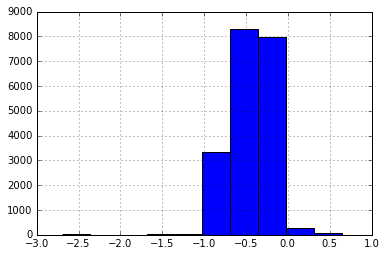

In [28]:
df.monthly.hist()

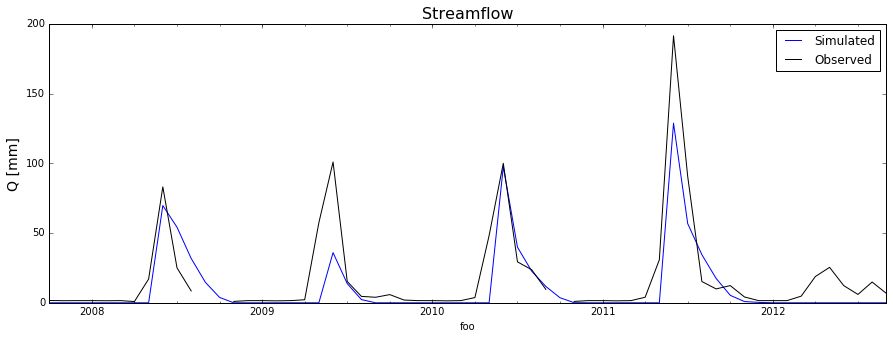

In [29]:
plt.figure(figsize=(15,5))
dat_monthly.streamflow.plot(label='Simulated',c='b')
Q_monthly.discharge.plot(label='Observed',c='k')
plt.legend()
plt.title('Streamflow', fontsize=16)
plt.ylabel('Q [mm]', fontsize=14)

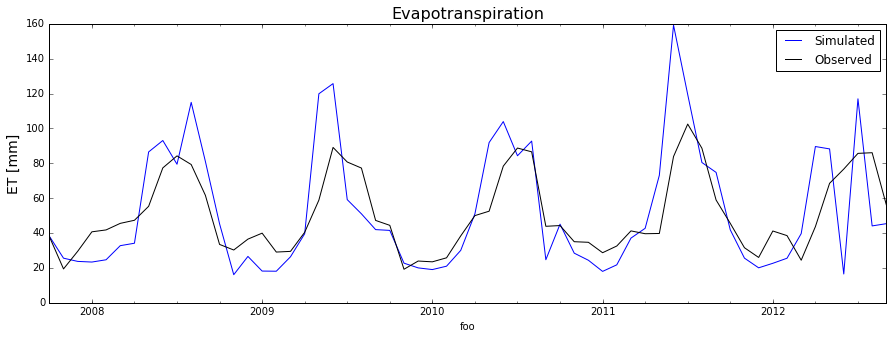

In [30]:
plt.figure(figsize=(15,5))
dat_monthly.ET.plot(label='Simulated',c='b')
FT_monthly.ET.plot(label='Observed',c='k')
plt.legend()
plt.title('Evapotranspiration', fontsize=16)
plt.ylabel('ET [mm]', fontsize=14)

In [31]:
calname

'et_cal29'

In [44]:
dat_daily.columns

Index([u'basinID', u'pot_surface_infil', u'snow_thr', u'sat_def_z', u'sat_def',
       u'rz_storage', u'unsat_stor', u'rz_drainage', u'unsat_drain', u'cap',
       u'evap', u'snowpack', u'trans', u'baseflow', u'return', u'streamflow',
       u'psn', u'lai', u'gw.Qout', u'gw.storage', u'detention_store',
       u'%sat_area', u'litter_store', u'canopy_store', u'%snow_cover',
       u'snow_subl', u'trans_var', u'acc_trans', u'acctransv_var', u'pet',
       u'dC13', u'precip', u'pcp_assim', u'mortf', u'tmax', u'tmin', u'tavg',
       u'vpd', u'snowfall', u'recharge', u'gpsn', u'resp', u'gs', u'rootdepth',
       u'plantc', u'snowmelt', u'canopysubl', u'routedstreamflow',
       u'canopy_snow', u'height', u'evap_can', u'evap_lit', u'evap_soil',
       u'litrc', u'Kdown', u'Ldown', u'Kup', u'Lup', u'Kstar_can',
       u'Kstar_soil', u'Kstar_snow', u'Lstar_can', u'Lstar_soil',
       u'Lstar_snow', u'LE_canopy', u'LE_soil', u'LE_snow', u'Lstar_strat',
       u'canopydrip', u'ga', u'wateryear'

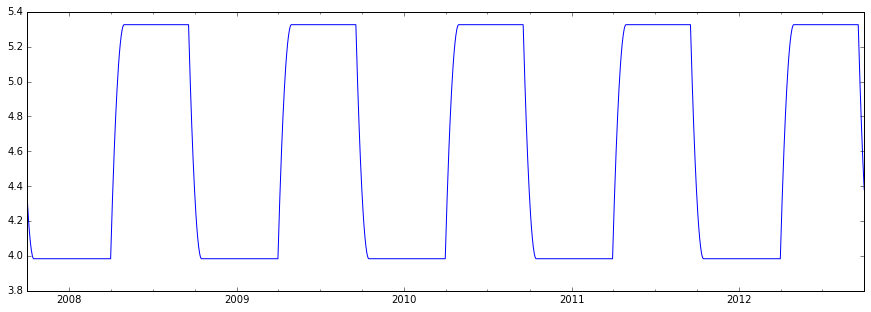

In [193]:
plt.figure(figsize=(15,5))
dat_daily.lai.plot()

In [40]:
dat_daily.lai.mean()

2.9485935966064685